In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import pandas as pd
# series = np.zeros(25)
# centre = random.randint(7,17)
# size = random.randrange(5,15,2)
# height = random.randint(1,25)
# if (size%2)==0:
#     series[centre-math.floor(size/2):centre+math.floor(size/2)]=1
# else:
#     series[centre-math.floor(size/2):centre+math.floor(size/2)+1]=1
# return series*height, height


In [98]:
cur_root_dir = '/home/javidan/Codes/UCRArchive_2018'

for dataset_name in ['LargeKitchenAppliances']:
    df_train =  pd.read_csv(cur_root_dir + '/' + dataset_name + '/' + dataset_name + '_TRAIN.tsv', sep='\t', header=None)
    df_test =  pd.read_csv(cur_root_dir + '/' + dataset_name + '/' + dataset_name + '_TEST.tsv', sep='\t', header=None)

    y_train = df_train.values[:, 0]
    y_test = df_test.values[:, 0]
    
    x_train = df_train.drop(columns=[0])
    x_test = df_test.drop(columns=[0])
    
    x_train.columns = range(x_train.shape[1])
    x_test.columns = range(x_test.shape[1])
    
    x_train = x_train.values
    x_test = x_test.values
    
    # znorm
    std_ = x_train.std(axis=1, keepdims=True)
    std_[std_ == 0] = 1.0
    x_train = (x_train - x_train.mean(axis=1, keepdims=True)) / std_
    
    std_ = x_test.std(axis=1, keepdims=True)
    std_[std_ == 0] = 1.0
    x_test = (x_test - x_test.mean(axis=1, keepdims=True)) / std_
    


In [84]:
df_train[100:200]

,0,1,2,3,4,5,6,7,8,9,...,711,712,713,714,715,716,717,718,719,720
100,1,-0.129946,-0.113862,-0.129946,-0.129946,-0.113862,-0.129946,-0.129946,-0.113862,-0.129946,...,-0.113862,-0.129946,-0.129946,-0.113862,-0.129946,-0.129946,-0.113862,-0.129946,-0.129946,-0.113862
101,1,-0.128028,-0.111904,-0.128028,-0.128028,-0.111904,-0.128028,-0.128028,-0.111904,-0.128028,...,-0.111904,-0.128028,-0.128028,-0.111904,-0.128028,-0.128028,-0.111904,-0.128028,-0.128028,-0.111904
102,1,-0.179835,-0.179835,-0.168413,-0.179835,-0.179835,-0.168413,-0.179835,-0.179835,-0.168413,...,-0.179835,-0.179835,-0.168413,-0.179835,-0.179835,-0.168413,-0.179835,-0.168413,-0.179835,-0.179835
103,1,-0.183019,-0.194103,-0.194103,-0.183019,-0.194103,-0.194103,-0.183019,-0.194103,-0.194103,...,-0.183019,-0.194103,-0.194103,-0.183019,-0.194103,-0.194103,-0.183019,-0.194103,-0.194103,-0.183019
104,1,-0.136529,-0.120308,-0.136529,-0.136529,-0.120308,-0.136529,-0.136529,-0.120308,-0.136529,...,-0.136529,-0.136529,-0.120308,-0.136529,-0.136529,-0.120308,-0.136529,-0.136529,-0.120308,-0.136529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,-0.181826,-0.172873,-0.172873,-0.181826,-0.172873,-0.172873,-0.181826,-0.172873,-0.172873,...,-0.172873,-0.181826,-0.172873,-0.172873,-0.181826,-0.172873,-0.181826,-0.172873,-0.172873,-0.181826
196,2,-0.174838,-0.174838,-0.183554,-0.174838,-0.174838,-0.183554,-0.174838,-0.174838,-0.183554,...,-0.183554,-0.174838,-0.174838,-0.183554,-0.174838,-0.174838,-0.183554,-0.174838,-0.174838,-0.183554
197,2,-0.172706,-0.172706,-0.181515,-0.172706,-0.172706,-0.181515,-0.172706,-0.172706,-0.181515,...,-0.172706,-0.172706,-0.181515,-0.172706,-0.172706,-0.181515,-0.172706,-0.172706,-0.181515,-0.172706
198,2,-0.172831,-0.181640,-0.172831,-0.172831,-0.181640,-0.172831,-0.172831,-0.181640,-0.172831,...,-0.172831,-0.172831,-0.181640,-0.172831,-0.172831,-0.181640,-0.172831,-0.172831,-0.181640,-0.172831


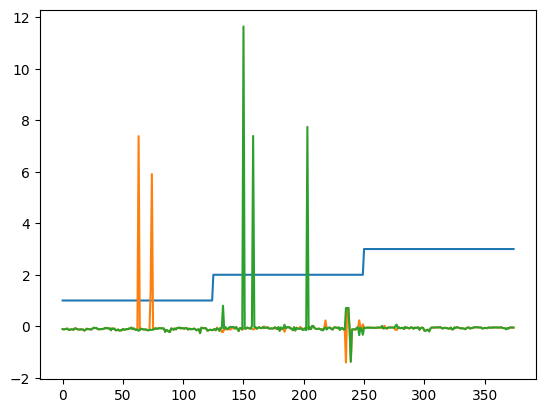

In [82]:
plt.plot(df_train[0].tolist())
plt.plot(df_train[195].tolist())

plt.plot(df_train[374].tolist())

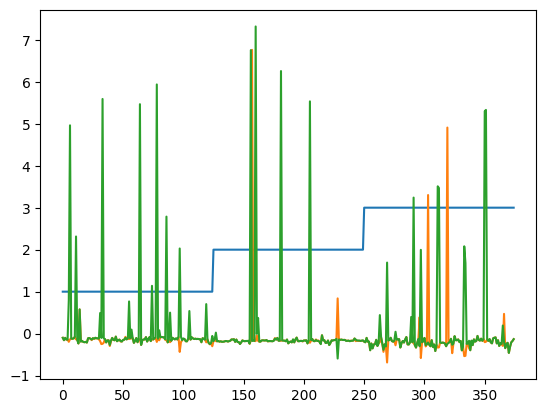

In [85]:
plt.plot(df_train[0].tolist())
plt.plot(df_train[195].tolist())

plt.plot(df_train[374].tolist())

In [96]:
y_train

In [122]:
x_train.shape

(375, 720)

i =  0
y_train:  3.0
i =  1
y_train:  3.0
i =  2
y_train:  3.0
i =  3
y_train:  3.0
i =  4
y_train:  3.0


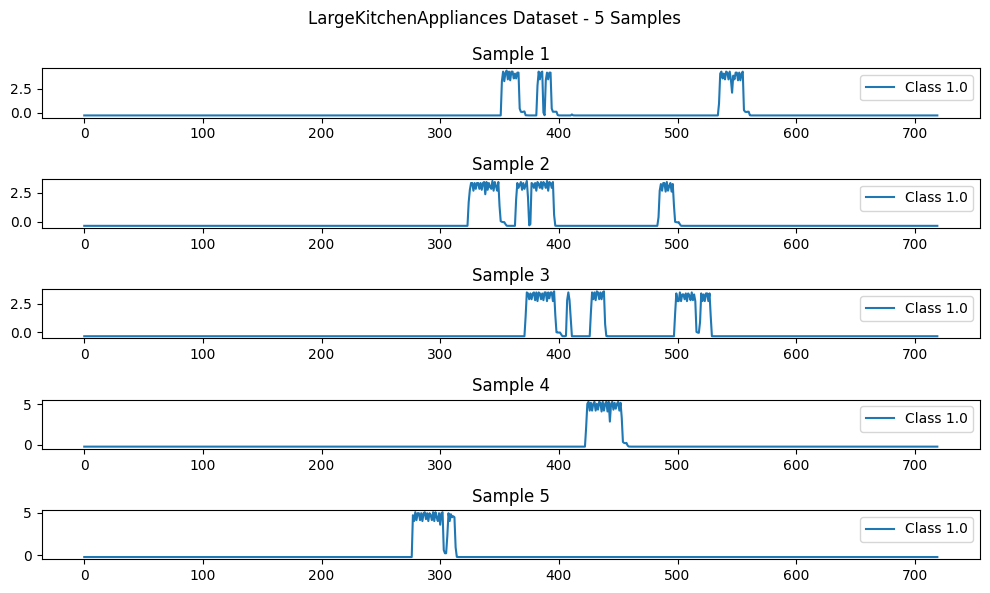

In [131]:
# Plot a few samples from the dataset
n_samples = 5  # Number of samples to plot
fig, axs = plt.subplots(n_samples, 1, figsize=(10, 6))
delta = 310
for i in range(n_samples):
    print('i = ', i)
    print('y_train: ', y_train[i+delta])
    axs[i].plot(x_train[i+delta], label=f'Class {y_train[i]}')
    axs[i].set_title(f'Sample {i+1}')
    axs[i].legend()

plt.suptitle(f'{dataset_name} Dataset - {n_samples} Samples')
plt.tight_layout()
plt.show()


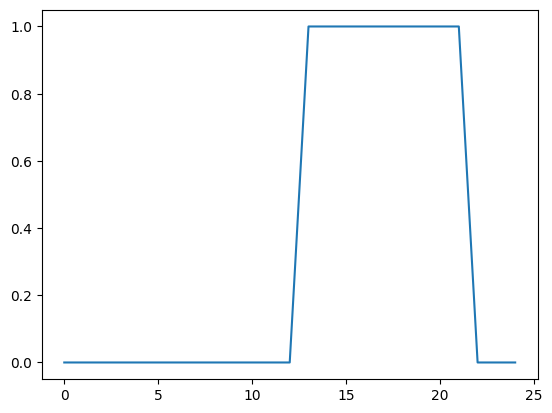

In [2]:
plt.plot(series)

In [3]:
centre

17

In [4]:
size

9

In [5]:
height

6

In [3]:
import random
import math

#### Creation of class 1 samples

In [4]:
def create_random_triangle_class():
    series = np.zeros(25)
    centre = random.randint(7,17)
    size = random.randint(5,15)
    height = random.randint(1,25)
    
    series[centre-math.floor(size/2):centre+1]=np.linspace(0,1,math.floor(size/2)+1)  
    series[centre:centre+math.floor(size/2)+1]=np.linspace(1,0,math.floor(size/2)+1) 
    
    return series * height

def create_random_square():
	series = np.zeros(25)
	centre = random.randint(7,17)
	size = random.randrange(5,15,2)
	height = random.randint(1,25)
	if (size%2)==0:
		series[centre-math.floor(size/2):centre+math.floor(size/2)]=1
	else:
		series[centre-math.floor(size/2):centre+math.floor(size/2)+1]=1
	return series*height



def create_ds_with_class():
    subseries = []
    rand_square1 = create_random_triangle_class()
    rand_square2 = np.zeros(25)

    subseries.append(rand_square2)
    subseries.append(rand_square2)
    subseries.append(rand_square2)
    subseries.append(rand_square1)
    subseries.append(rand_square2)
    subseries.append(rand_square2)
    subseries.append(rand_square2)
    subseries.append(rand_square2)
    # rand_square4 = create_random_square()
    subseries.append(rand_square2)
    subseries.append(rand_square2)
    subseries.append(rand_square2)
    subseries.append(rand_square2)

    order = np.arange(12)
    series = subseries[order[0]]

    for i in range(1,12):
        series = np.concatenate((series,subseries[order[i]]))

    return series.reshape(300, 1)

def create_toys_dataset_class_1(num_samples):
	dataset_input = np.empty((num_samples,300,1))
	for i in range(num_samples):
		dataset_input[i] = create_ds_with_class()
	return dataset_input


#### Creation of class 2 samples

In [5]:
def create_ds_with_class_2():
    subseries = []

    rand_square1 = np.zeros(25)
    subseries.append(rand_square1)    
    subseries.append(rand_square1)
    subseries.append(rand_square1)
    rand_square2 = create_random_triangle_class()
    subseries.append(rand_square2)

    order = np.arange(4)
    series = subseries[order[0]]

    for i in range(1,4):
        series = np.concatenate((series,subseries[order[i]]))

    return series.reshape(150, 1)

def create_toys_dataset_class_2(num_samples):
	dataset_input = np.empty((num_samples,100,1))
	for i in range(num_samples):
		dataset_input[i] = create_ds_with_class_2()

	return dataset_input

#### Make the dataset

In [6]:
input_class_1 = create_toys_dataset_class_1(100)
# input_class_2 = create_toys_dataset_class_2(100)
input_class_2 = input_class_1[:, ::-1, :]

target_1 = np.zeros(100)
target_2 = np.ones(100)

X = np.concatenate((input_class_1, input_class_2))
y = np.concatenate((target_1, target_2))

#### Plot 2 samples with different classes from the dataset


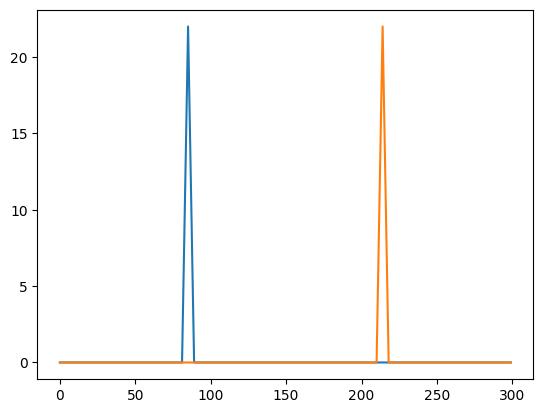

In [7]:
plt.plot(input_class_1[0])
plt.plot(input_class_2[0])

#### Preprocess the data before training

In [8]:
# Spltit all data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


from sklearn.preprocessing import LabelEncoder

def transform_labels(y_train, y_test):
    """
    Transform label to min equal zero and continuous
    For example if we have [1,3,4] --->  [0,1,2]
    """
    encoder = LabelEncoder()
    y_train_test = np.concatenate((y_train, y_test), axis=0)
    encoder.fit(y_train_test)
    # transform to min zero and continuous labels
    new_y_train_test = encoder.transform(y_train_test)
    # resplit the train and test
    new_y_train = new_y_train_test[0:len(y_train)]
    new_y_test = new_y_train_test[len(y_train):]
    return new_y_train, new_y_test

# Apply LabelEncoder on the target variable
y_train, y_test = transform_labels(y_train, y_test)

# Normalize the data
mu = X_train.mean()
std = X_train.std()
X_train = (X_train-mu)/std

mu_y = X_test.mean()
std_y = X_test.std()
X_test = (X_test-mu_y)/std_y

# Convert numpy arrays to pytorch tensors
import torch
from torch.utils.data import DataLoader, TensorDataset

X_train, y_train = torch.from_numpy(X_train).permute(0, 2, 1), torch.from_numpy(y_train)
X_test, y_test = torch.from_numpy(X_test).permute(0, 2, 1), torch.from_numpy(y_test)

trainlaoder = DataLoader(TensorDataset(X_train, y_train), batch_size=16, shuffle=True)
testloader = DataLoader(TensorDataset(X_test, y_test), batch_size=16, shuffle=False)

### Classifier Model - Convolution

In [15]:
from torch import nn

class FCN_1_layer(nn.Module):

    def __init__(self, input_shape, nb_classes, filter_count):
        super(FCN_1_layer, self).__init__()
        self.nb_classes = nb_classes
        self.filter_count = filter_count

        self.conv1 = nn.Conv1d(in_channels=1, out_channels=self.filter_count, kernel_size=50, stride=1, padding='same', bias=False)
        self.bn1 = nn.BatchNorm1d(self.filter_count,)
    
        self.conv2 = nn.Conv1d(in_channels=self.filter_count, out_channels=self.filter_count, kernel_size=50, stride=1, padding='same', bias=False)
        self.bn2 = nn.BatchNorm1d(self.filter_count,)

            
        self.conv3 = nn.Conv1d(in_channels=self.filter_count, out_channels=self.filter_count, kernel_size=40, stride=1, padding='same', bias=False)
        self.bn3 = nn.BatchNorm1d(self.filter_count,)

        self.relu = nn.ReLU()

        self.avgpool1 = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(self.filter_count, self.nb_classes)

    def forward(self, x):
        # First convolutional block
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        # Second convolutional block
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        
        # Third convolutional block
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)

        x = self.avgpool1(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)

        return x

### Train the model

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [10]:
def test(model):
    with torch.no_grad():
        model.eval()
        test_loss = 0
        correct = 0
        total = 0

        for b_idx, (x, y) in enumerate(testloader):
            (x, y) = x.to(device), y.to(device)
            pred = model(x.float())

            loss = lossFn(pred, y)
            test_loss += loss.item()

            total += y.size(0)
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        print('Test Loss: %.3f | Test Acc: %.3f%% (%d/%d)' % (test_loss / (b_idx + 1), 100. * correct / total, correct, total))
        return test_loss / (b_idx + 1), 100. * correct / total

In [ ]:
import torch.optim as optim

model = FCN_1_layer((100, 1), 2, 128)
lossFn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001,)
EPOCHS = 1000

model.to(device)

train_losses, test_losses, test_accs = [], [], []

for e in range(0, EPOCHS):
    model.train()

    # initlaize total training loss
    totalTainLoss = 0

    # initialize number of correct predictions in the training
    trainCorrect = 0

    for (x, y) in trainlaoder:
        # send the input to the device
        x, y = x.to(device), y.to(device)
        
        # perform a forward pass and calculate the training loss
        pred = model(x.float())
        loss = lossFn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        totalTainLoss += loss
        trainCorrect += (pred.argmax(1) == y).type(torch.float).sum().item()


    print('Train loss: ', totalTainLoss.item())
    train_losses.append(totalTainLoss.item())
    test_loss, test_acc = test(model)
    test_losses.append(test_loss)
    test_accs.append(test_acc)


In [274]:
totalTainLoss.item()

6.721059799194336

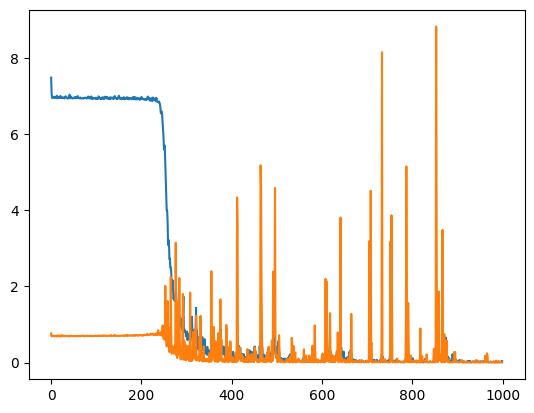

In [280]:
plt.plot(train_losses)
plt.plot(test_losses)

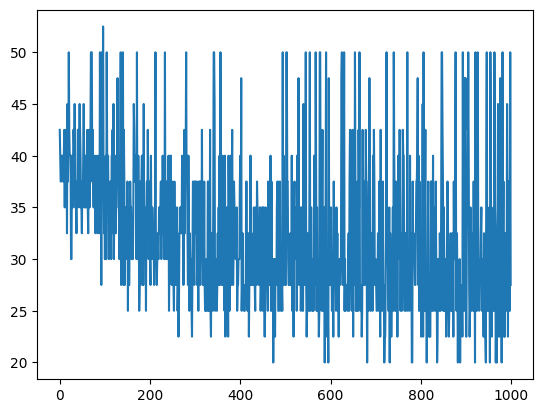

In [245]:
plt.plot(test_accs)

### Classifier Model - Attention

##### Positional Encoding

In [ ]:
class AbsolutePositionalEncoding(nn.Module):
    r"""Inject some information about the relative or absolute position of the tokens in the sequence. 
        The positional encodings have the same dimension as the embeddings, so that the two can be summed. 
        Here, we use sine and cosine functions of different frequencies.
    .. math::
        \text{PosEncoder}(pos, 2i) = sin(pos/10000^(2i/d_model))
        \text{PosEncoder}(pos, 2i+1) = cos(pos/10000^(2i/d_model))
        \text{where pos is the word position and i is the embed idx)
    Args:
        d_model: the embed dim (required).
        dropout: the dropout value (default=0.1).
        max_len: the max. length of the incoming sequence (default=1024).
    """

    def __init__(self, d_model, dropout=0.1, max_len=1024, scale_factor=1.0):
        super(AbsolutePositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        pe = torch.zeros(max_len, d_model)  # positional encoding
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = scale_factor * pe.unsqueeze(0)
        self.register_buffer('pe', pe)  # this stores the variable in the state_dict (used for non-trainable variables)

    def forward(self, x):
        r"""Inputs of forward function
        Args:
            x: the sequence fed to the positional encoder model (required).
        Shape:
            x: [sequence length, batch size, embed dim]
            output: [sequence length, batch size, embed dim]
        """
        # print('Input shape ', x.shape)
        # print('self.pe shape ', self.pe.shape)

        x = x + self.pe
        return self.dropout(x)


: 

#### Embedding Layer

In [309]:
X_train.shape

torch.Size([160, 1, 300])

In [316]:
emb_size = 16
embed_layer = nn.Sequential( nn.Conv1d(1, emb_size, kernel_size=8, padding='same'),
                            nn.BatchNorm1d(emb_size),
                            nn.GELU())

out = embed_layer(X_train.float())

In [317]:
out.shape

torch.Size([160, 16, 300])

In [67]:
class Attention(nn.Module):
    def __init__(self, emb_size, num_heads, dropout):
        super().__init__()
        self.num_heads = num_heads
        self.scale = emb_size ** -0.5

        self.query = nn.Linear(emb_size, emb_size, bias=False)
        self.key = nn.Linear(emb_size, emb_size, bias=False)
        self.value = nn.Linear(emb_size, emb_size, bias=False)

        self.dropout = nn.Dropout(dropout)
        self.to_out = nn.LayerNorm(emb_size)

    
    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        k = self.key(x).reshape(batch_size, seq_len, self.num_heads, -1).permute(0, 2, 3, 1)
        v = self.value(x).reshape(batch_size, seq_len, self.num_heads, -1).transpose(1, 2)
        q = self.query(x).reshape(batch_size, seq_len, self.num_heads, -1).transpose(1, 2)

        attn = torch.matmul(q, k) * self.scale
        attn = nn.functional.softmax(attn, dim=-1)

        out = torch.matmul(attn, v)
        out = out.transpose(1, 2)
        out = out.reshape(batch_size, seq_len, -1)
        out = self.to_out(out)

        return out

class AttentionModel(nn.Module):
    def __init__(self, emb_size, num_heads, dropout, num_classes, dim_ff):
        super().__init__()
        self.embed_layer = nn.Sequential(nn.Conv1d(1, emb_size, kernel_size=8, padding='same'),
                                         nn.BatchNorm1d(emb_size),
                                         nn.GELU())
        self.Fix_pos_encode = AbsolutePositionalEncoding(emb_size, max_len=300)
        self.attn_layer = Attention(emb_size, num_heads, dropout)

        self.LayerNorm1 = nn.LayerNorm(emb_size, eps=1e-5)
        self.LayerNorm2 = nn.LayerNorm(emb_size, eps=1e-5)

        self.FeedForward = nn.Sequential(
            nn.Linear(emb_size, dim_ff),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(dim_ff, emb_size),
            nn.Dropout(dropout)
        )

        self.gap = nn.AdaptiveAvgPool1d(1)
        self.flatten = nn.Flatten()
        self.to_out = nn.Linear(emb_size, num_classes)

        
    def forward(self, x):
        # print('Input shape: ', x.shape)
        x_src = self.embed_layer(x)

        # print('Output shape: ', x_src.shape)
        x_src = x_src.permute(0, 2, 1)
        # x_src = self.Fix_pos_encode(x_src)
        x = x_src + self.attn_layer(x_src)
        att = self.LayerNorm1(x)
        out = att + self.FeedForward(att)
        out = self.LayerNorm2(out)
        out = out.permute(0, 2, 1)
        # out = x_src.permute(0, 2, 1)
        # print('After permutation: ', x_src.shape)
        out = self.gap(out)
        # print('After gap: ', out.shape)
        out = self.flatten(out)
        # print('After flatten: ', out.shape)
        out = self.to_out(out)
        # print('classification layer ', out.shape)
        return out

In [61]:
model = AttentionModel(16, 8, 0.1, 2, 64)

In [62]:
X_train.shape

torch.Size([160, 1, 300])

In [ ]:
model(X_train.float())

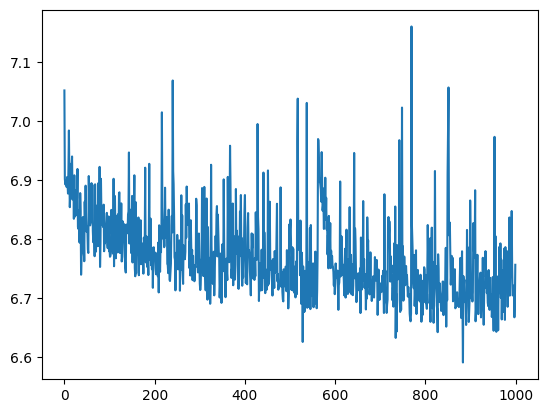

In [69]:
plt.plot(train_losses)

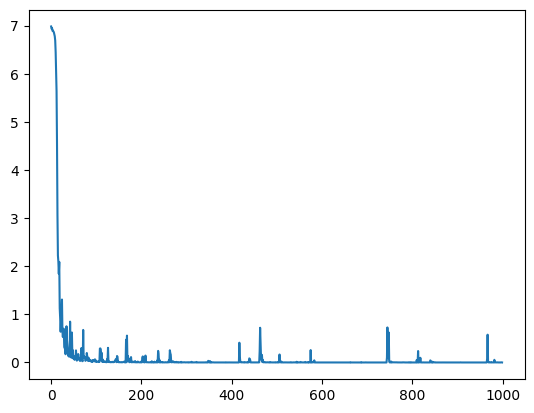

In [66]:
plt.plot(train_losses)

In [ ]:
import torch.optim as optim

model = AttentionModel(16, 8, 0.1, 2, 64)
lossFn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001,)
EPOCHS = 1000

model.to(device)

train_losses, test_losses, test_accs = [], [], []

for e in range(0, EPOCHS):
    model.train()

    # initlaize total training loss
    totalTainLoss = 0

    # initialize number of correct predictions in the training
    trainCorrect = 0

    for (x, y) in trainlaoder:
        # send the input to the device
        x, y = x.to(device), y.to(device)
        
        # perform a forward pass and calculate the training loss
        pred = model(x.float())
        loss = lossFn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        totalTainLoss += loss
        trainCorrect += (pred.argmax(1) == y).type(torch.float).sum().item()


    print('Train loss: ', totalTainLoss.item())
    train_losses.append(totalTainLoss.item())
    test_loss, test_acc = test(model)
    test_losses.append(test_loss)
    test_accs.append(test_acc)


In [263]:
import torch
import torch.nn as nn
import math

class Padding(nn.Module):

    def __init__(self, patch_size):
        super(Padding, self).__init__()
        self.patch_size = patch_size

    def forward(self, x):
        B, D, L= x.size()
        print('x shape: ', x.shape)
        if L % self.patch_size != 0:
            padd_size = self.patch_size - L % self.patch_size
            print('padd_size: ', padd_size)
            num_patches = math.ceil(L / self.patch_size)
            print('num_patches: ', num_patches)
            last_elements = x[:, :, -1:]
            print('last_elements: ', last_elements.shape)
            num_missing_values = self.patch_size - (L % self.patch_size)
            print('num_missing_values: ', num_missing_values)
            if num_missing_values > 0:
                padding = last_elements.repeat(1, 1, num_missing_values)
                print('padding shape: ', padding.shape)
                x = torch.cat([x, padding], dim=2)
                print('x shape: ', x.shape)
            print('final shape: ', x.shape)

            x = x.view(B, D, -1, self.patch_size)
        else:
            x = x.view(B, D, -1, self.patch_size)


        return  x.permute(0, 2, 1, 3)


# Example usage:
patch_size = 4
num_heads = 2
sequence_length = 720
batch_size = 128

In [264]:
# Create sample input sequence data
input_data = torch.randn(batch_size, 1, sequence_length)

input_data.shape

torch.Size([128, 1, 720])

In [265]:
patching_layer = Padding(patch_size)
patched_input = patching_layer(input_data)
patched_input.shape

x shape:  torch.Size([128, 1, 720])


torch.Size([128, 180, 1, 4])

In [270]:
import torch

input_tensor = torch.randn(16, 1, 720)
reshaped_input = input_tensor.permute(0, 2, 1)  # (batch_size, seq_len, channels)
dummy_channel = torch.ones((16, 720, 1))
combined_input = torch.cat([input_tensor, dummy_channel], dim=-1)  # (batch_size, seq_len, channels)
import torch.nn as nn

# Define parameters for self-attention (adjust accordingly)
num_heads = 8
d_model = 512

attention_layer = nn.MultiheadAttention(embed_dim=d_model, num_heads=num_heads)

output = attention_layer(reshaped_input, reshaped_input, reshaped_input)  # (batch_size, seq_len, channels)


RuntimeError: Sizes of tensors must match except in dimension 2. Expected size 1 but got size 720 for tensor number 1 in the list.

In [133]:
import torch
import torch.nn as nn
import math

class Padding(nn.Module):

    def __init__(self, patch_size):
        super(Padding, self).__init__()
        self.patch_size = patch_size

    def forward(self, x):
        B, D, L = x.size()
        padd_size = self.patch_size - L % self.patch_size
        
        num_patches = math.ceil(L / self.patch_size)
        last_elements = x[:, :, -1:]
        num_missing_values = self.patch_size - (L % self.patch_size)
        if num_missing_values > 0:
            padding = last_elements.repeat(1, 1, num_missing_values)
            x = torch.cat([x, padding], dim=2)

        print('final shape: ', x.shape)

        x = x.view(B, D, -1, self.patch_size)

        return  x.permute(0, 2, 1, 3)


# Example usage:
patch_size = 4
num_heads = 2
sequence_length = 720
batch_size = 128

# Create sample input sequence data
input_data = torch.randn(batch_size, sequence_length, patch_size)

# Apply patching
patching_layer = Patching(patch_size)
patches = patching_layer(input_data)
print("Patched data shape:", patches.shape)

# Apply self-attention
attention_layer = SelfAttention(patch_size, num_heads)
output = attention_layer(patches)
print("Output shape after self-attention:", output.shape)

NameError: name 'Patching' is not defined

In [76]:
input_data = torch.randn(16, 128, 577)
patching_layer = Patching(10)
patches = patching_layer(input_data)

batch size:  16
Number of channels:  128
Sequence LengthL:  577
self patch size:  10
padd suze:  3
number of patches:  58
last_elements shape:  torch.Size([16, 128, 1])
padding shape:  torch.Size([16, 128, 3])
original shape:  torch.Size([16, 128, 580])
final shape:  torch.Size([16, 128, 58, 10])


In [43]:
last_elements = input_data[:, :, -1]
last_elements.shape

torch.Size([16, 128])

In [30]:
import tensorflow as tf

input = tf.random.normal((256, 237, 21))
conv_layer = tf.keras.layers.Conv1D(filters=1024, kernel_size=5, padding='same')
y = conv_layer(input)


In [31]:
y.shape

TensorShape([256, 237, 1024])

In [32]:
x = torch.randn(256, 237, 21)
conv_layer = nn.Conv1d(in_channels=21, out_channels=1024, kernel_size=5, padding=2)
y = conv_layer(x.permute(0, 2, 1))


In [33]:
y.shape

torch.Size([256, 1024, 237])

In [54]:
pip install einops

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [62]:
import torch
from torchvision.datasets import OxfordIIITPet
import matplotlib.pyplot as plt
from random import random
from torchvision.transforms import Resize, ToTensor
from torchvision.transforms.functional import to_pil_image

to_tensor = [Resize((144, 144)), ToTensor()]

class Compose(object):
    
    def __init__(self, transforms):
        self.transforms = transforms

    
    def __call__(self, image, target):
        for t in self.transforms:
            image = t(image)
    
        
        return image, target


dataset = OxfordIIITPet(root='.', download=False, transforms=Compose(to_tensor))

In [103]:
from torch import nn
from einops.layers.torch import Rearrange
from torch import Tensor


class PatchEmbedding(nn.Module):
    def __init__(self, in_channels=3, patch_size=8, emb_size=128):
        self.patch_size = patch_size
        super().__init__()
        self.projection = nn.Sequential(
            Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=patch_size, p2=patch_size),
            # nn.Linear(patch_size * patch_size * in_channels, emb_size)
        )

    def forward(self, x:Tensor) -> Tensor:
        x = self.projection(x)
        return x

sample_datapoint = torch.unsqueeze(dataset[0][0], 0)
sample_datapoint.shape

torch.Size([1, 3, 144, 144])

In [104]:
dataset[0][0].shape

torch.Size([3, 144, 144])

In [105]:
embedding = PatchEmbedding()(sample_datapoint)

In [106]:
embedding.shape

torch.Size([1, 324, 192])

# Attention

In [87]:
import aeon
from aeon.datasets import load_arrow_head

x_train, y_train = load_arrow_head(split='TRAIN')
x_test, y_test = load_arrow_head(split='TEST')

std_ = x_train.std(axis=1, keepdims=True)
std_[std_ == 0] = 1.0
x_train = (x_train - x_train.mean(axis=1, keepdims=True)) / std_

std_ = x_test.std(axis=1, keepdims=True)
std_[std_ == 0] = 1.0
x_test = (x_test - x_test.mean(axis=1, keepdims=True)) / std_


In [88]:
inputs = torch.randn(16, 128, 251)

In [101]:
from torch import nn
from einops.layers.torch import Rearrange
from torch import Tensor


class PatchEmbedding(nn.Module):
    def __init__(self, in_channels=128, patch_size=10, emb_size=32):
        self.patch_size = patch_size
        super().__init__()
        self.projection = nn.Sequential(
            Rearrange('b c (h p) -> b h (p c)', p=patch_size,),
            nn.Linear(patch_size * in_channels, emb_size)
        )

    def forward(self, x:Tensor) -> Tensor:
        x = self.projection(x)
        return x

patched_input = PatchEmbedding()(padded_input)
patched_input.shape

torch.Size([16, 58, 32])

In [102]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=512):
        super(PositionalEncoding, self).__init__()
        self.d_model = d_model
        self.max_len = max_len
        
        # Compute the positional encodings
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        
        # Register the positional encodings as buffer (not trainable)
        self.register_buffer('pe', pe)
    
    def forward(self, x):
        # Add the positional encodings to the input embeddings
        batch_size, num_patches, patch_length = x.size()
        positional_encodings = self.pe[:, :num_patches, :]
        return x + positional_encodings


d_model = 32  # Embedding dimension (same as patch length)
max_len = 832  # Maximum sequence length
pos_encoder = PositionalEncoding(d_model, max_len)
output_data = pos_encoder(patched_input)
output_data.shape

torch.Size([16, 58, 32])